Download dos dados disponíveis no link do github: https://github.com/reisaraujo-miguel/trab2-ia-censo-ed-2023/tree/main


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("microdados-clean.csv", encoding='latin1', sep=';')
df

,IN_AGUA_POTAVEL,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_AUDITORIO,IN_BANHEIRO,IN_BIBLIOTECA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,...,IN_MATERIAL_PED_MULTIMIDIA,IN_MATERIAL_PED_CIENTIFICO,IN_MATERIAL_PED_DIFUSAO,IN_MATERIAL_PED_MUSICAL,IN_MATERIAL_PED_JOGOS,IN_MATERIAL_PED_ARTISTICAS,IN_MATERIAL_PED_PROFISSIONAL,IN_MATERIAL_PED_DESPORTIVA,IN_MATERIAL_PED_ETNICO,IN_MATERIAL_PED_BIL_SURDOS
0,1,0,0,0,1,1,1,1,0,1,...,1,0,0,0,1,1,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,1,0,1,0,0
2,1,0,0,0,0,1,1,1,1,1,...,1,1,1,0,1,1,0,1,0,0
3,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,1,1,0,0,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163850,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
163851,1,0,0,0,1,1,1,1,1,1,...,1,1,1,0,1,1,0,0,0,1
163852,1,0,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,0,1,0,0
163853,1,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163855 entries, 0 to 163854
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   IN_AGUA_POTAVEL                 163855 non-null  int64
 1   IN_AGUA_INEXISTENTE             163855 non-null  int64
 2   IN_ENERGIA_INEXISTENTE          163855 non-null  int64
 3   IN_ESGOTO_INEXISTENTE           163855 non-null  int64
 4   IN_AUDITORIO                    163855 non-null  int64
 5   IN_BANHEIRO                     163855 non-null  int64
 6   IN_BIBLIOTECA                   163855 non-null  int64
 7   IN_COZINHA                      163855 non-null  int64
 8   IN_LABORATORIO_CIENCIAS         163855 non-null  int64
 9   IN_LABORATORIO_INFORMATICA      163855 non-null  int64
 10  IN_LABORATORIO_EDUC_PROF        163855 non-null  int64
 11  IN_QUADRA_ESPORTES              163855 non-null  int64
 12  IN_REFEITORIO                   163855 non-n

In [4]:
df['QT_SALAS_UTILIZADAS']

0          7
1          6
2         42
3          1
4         15
          ..
163850    15
163851    50
163852    16
163853    20
163854     8
Name: QT_SALAS_UTILIZADAS, Length: 163855, dtype: int64

# Pré-processamento dos dados

Precisamos escalar os dados quantitativos entre 0 e 1, já que os dados são um misto de dados binários e escalares. Para isso vamos usar o MinMaxScaler do scikit-learn, que utiliza a seguinte equação:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
# scale quantitive data between 0-1

scaler = MinMaxScaler()

qt_columns = [col for col in df.columns if col.startswith("QT")]

#df_scaled = df

for column in qt_columns:
    df[column] = scaler.fit_transform(df[[column]])

qt_columns

['QT_SALAS_UTILIZADAS',
 'QT_SALAS_UTILIZA_CLIMATIZADAS',
 'QT_SALAS_UTILIZADAS_ACESSIVEIS',
 'QT_EQUIP_DVD',
 'QT_EQUIP_SOM',
 'QT_EQUIP_TV',
 'QT_EQUIP_LOUSA_DIGITAL',
 'QT_EQUIP_MULTIMIDIA',
 'QT_DESKTOP_ALUNO',
 'QT_COMP_PORTATIL_ALUNO',
 'QT_TABLET_ALUNO',
 'QT_PROF_SERVICOS_GERAIS',
 'QT_PROF_BIBLIOTECARIO',
 'QT_PROF_SAUDE',
 'QT_PROF_ALIMENTACAO',
 'QT_PROF_SEGURANCA',
 'QT_PROF_ASSIST_SOCIAL',
 'QT_PROF_TRAD_LIBRAS']

In [7]:
df['QT_SALAS_UTILIZADAS']

0         0.002524
1         0.002103
2         0.017249
3         0.000000
4         0.005890
            ...   
163850    0.005890
163851    0.020614
163852    0.006310
163853    0.007993
163854    0.002945
Name: QT_SALAS_UTILIZADAS, Length: 163855, dtype: float64

# K-Prototypes

In [8]:
binary_columns = [i for i, col in enumerate(df.columns) if not col.startswith("QT")]

binary_columns

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 32,
 33,
 34,
 35,
 36,
 45,
 46,
 47,
 48,
 49,
 50,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68]

# Método do cotovelo para K-Prototypes

In [9]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

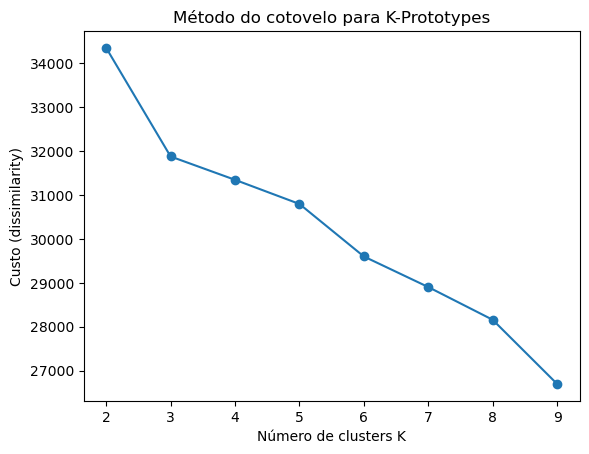

In [10]:
costs = []
K = range(2, 10)

for k in K:
    kp = KPrototypes(n_clusters=k, init='Cao', n_init=5, n_jobs=8)
    data_array = df.values

    kp.fit_predict(data_array, categorical=binary_columns)
    costs.append(kp.cost_)

plt.plot(K, costs, marker='o')
plt.xlabel('Número de clusters K')
plt.ylabel('Custo (dissimilarity)')
plt.title('Método do cotovelo para K-Prototypes')
plt.show()

# 3 clusters

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [12]:
kp = KPrototypes(n_clusters=3, init='Cao', verbose=1, n_jobs=8)

data_array = df.values

clusters = kp.fit_predict(data_array, categorical=binary_columns)

df['CLUSTER_LABELS'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4


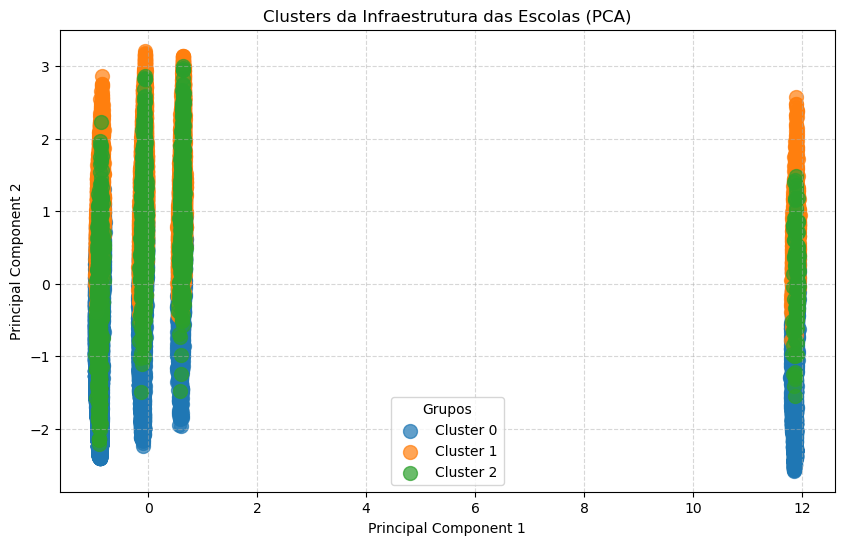

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_array)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))

unique_clusters = np.unique(clusters)

for cluster_id in unique_clusters:
    subset = pca_df[pca_df['Cluster'] == cluster_id]
    
    plt.scatter(
        subset['PC1'], 
        subset['PC2'],  
        label=f'Cluster {cluster_id}', 
        alpha=0.7,
        s=100
    )

plt.title('Clusters da Infraestrutura das Escolas (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Grupos")
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('pca-plot-3clusters.png', bbox_inches='tight')
plt.show()

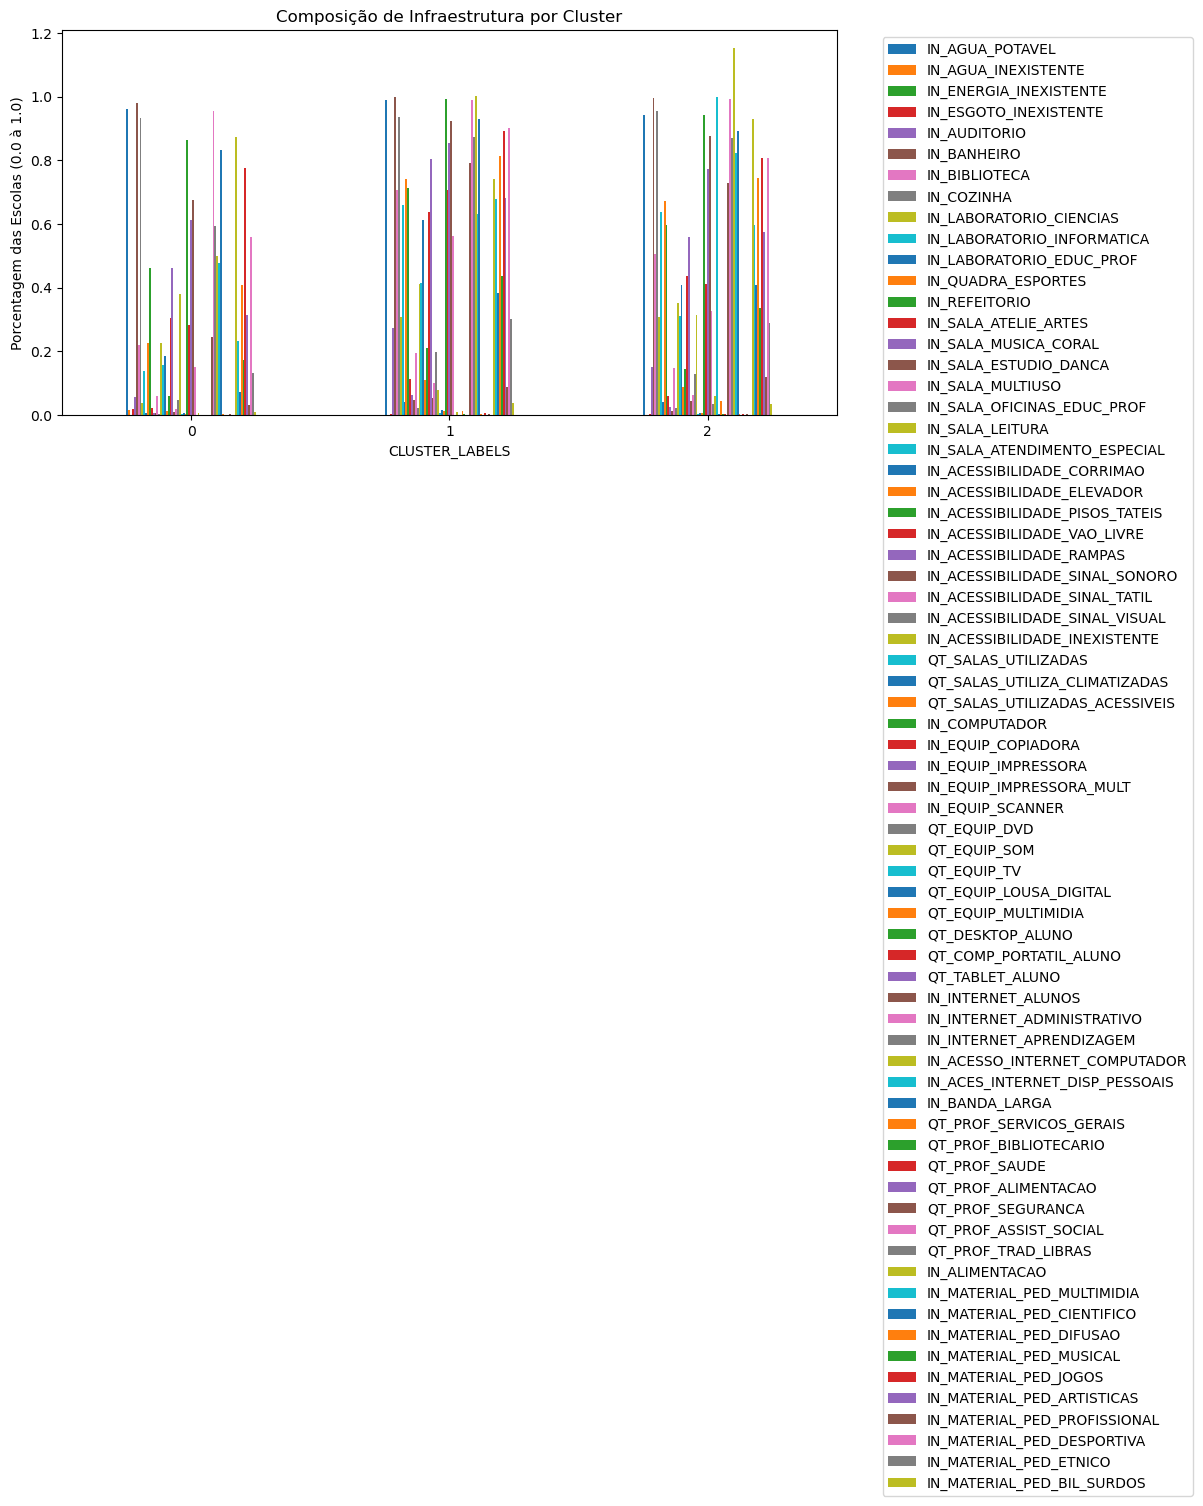

In [14]:
profile = df.groupby('CLUSTER_LABELS')[[col for col in df.columns if not col == 'CLUSTER_LABELS']].mean()

profile.plot(kind='bar', figsize=(10, 5))
plt.title('Composição de Infraestrutura por Cluster')
plt.ylabel('Porcentagem das Escolas (0.0 à 1.0)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
#plt.tight_layout()
plt.savefig('clusters-plot-3clusters.png', bbox_inches='tight')
plt.show()

# 4 clusters 

In [15]:
kp = KPrototypes(n_clusters=4, init='Cao', verbose=1, n_jobs=8)

data_array = df.values

clusters = kp.fit_predict(data_array, categorical=binary_columns)

df['CLUSTER_LABELS'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2


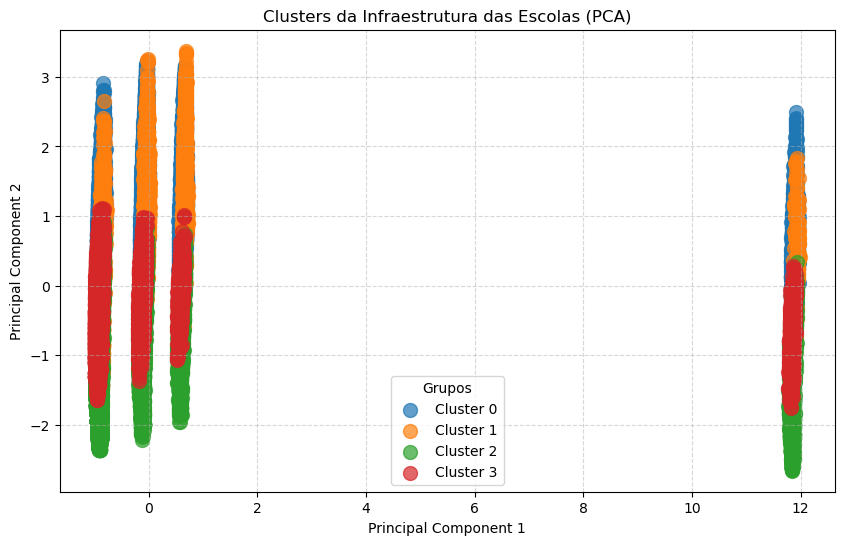

In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_array)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))

unique_clusters = np.unique(clusters)

for cluster_id in unique_clusters:
    subset = pca_df[pca_df['Cluster'] == cluster_id]
    
    plt.scatter(
        subset['PC1'], 
        subset['PC2'],  
        label=f'Cluster {cluster_id}', 
        alpha=0.7,
        s=100
    )

plt.title('Clusters da Infraestrutura das Escolas (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Grupos")
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('pca-plot-4clusters.png', bbox_inches='tight')
plt.show()

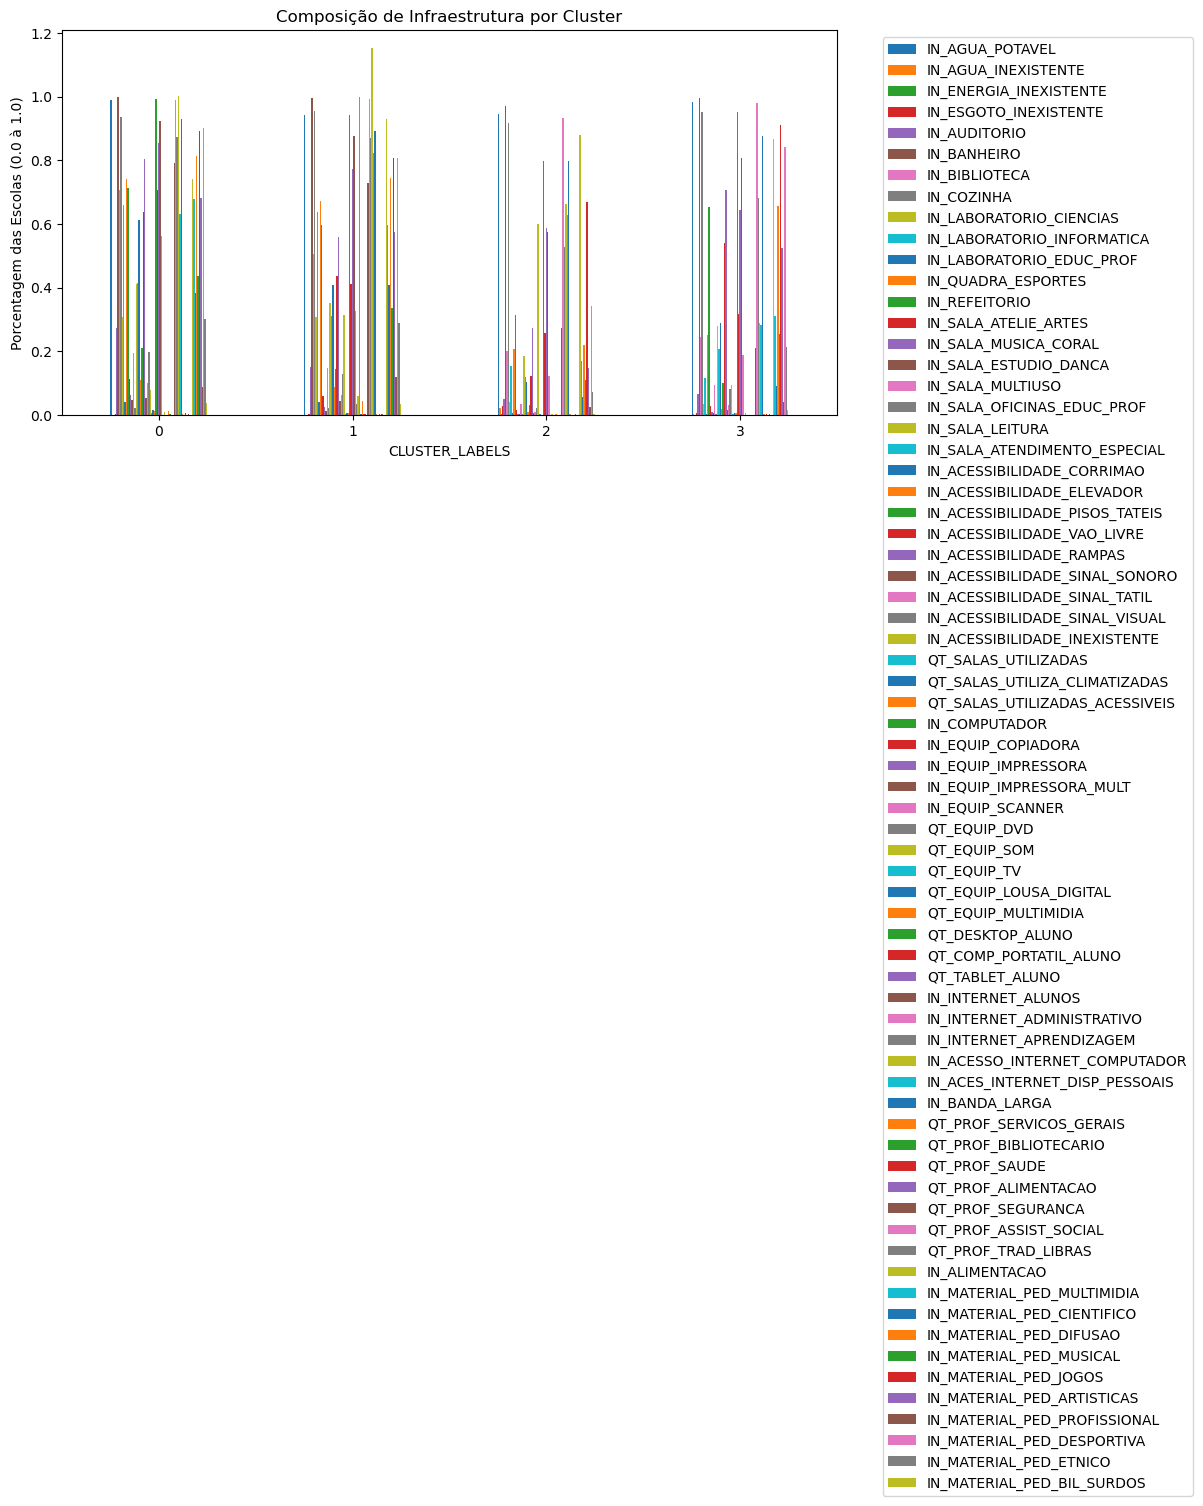

In [17]:
profile = df.groupby('CLUSTER_LABELS')[[col for col in df.columns if not col == 'CLUSTER_LABELS']].mean()

profile.plot(kind='bar', figsize=(10, 5))
plt.title('Composição de Infraestrutura por Cluster')
plt.ylabel('Porcentagem das Escolas (0.0 à 1.0)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
#plt.tight_layout()
plt.savefig('clusters-plot-4clusters.png', bbox_inches='tight')
plt.show()

# 5 clusters

In [18]:
kp = KPrototypes(n_clusters=5, init='Cao', verbose=1, n_jobs=8)

data_array = df.values

clusters = kp.fit_predict(data_array, categorical=binary_columns)

df['CLUSTER_LABELS'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2


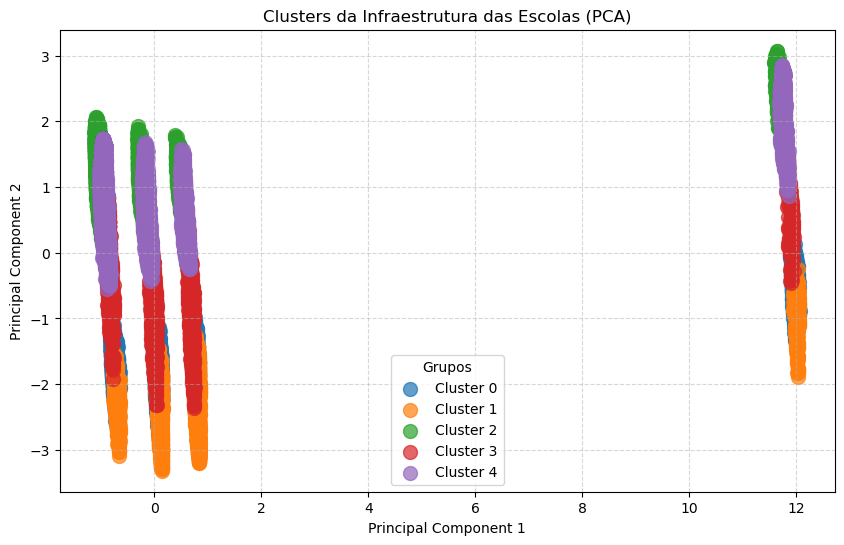

In [19]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_array)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))

unique_clusters = np.unique(clusters)

for cluster_id in unique_clusters:
    subset = pca_df[pca_df['Cluster'] == cluster_id]
    
    plt.scatter(
        subset['PC1'], 
        subset['PC2'],  
        label=f'Cluster {cluster_id}', 
        alpha=0.7,
        s=100
    )

plt.title('Clusters da Infraestrutura das Escolas (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Grupos")
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('pca-plot-5clusters.png', bbox_inches='tight')
plt.show()

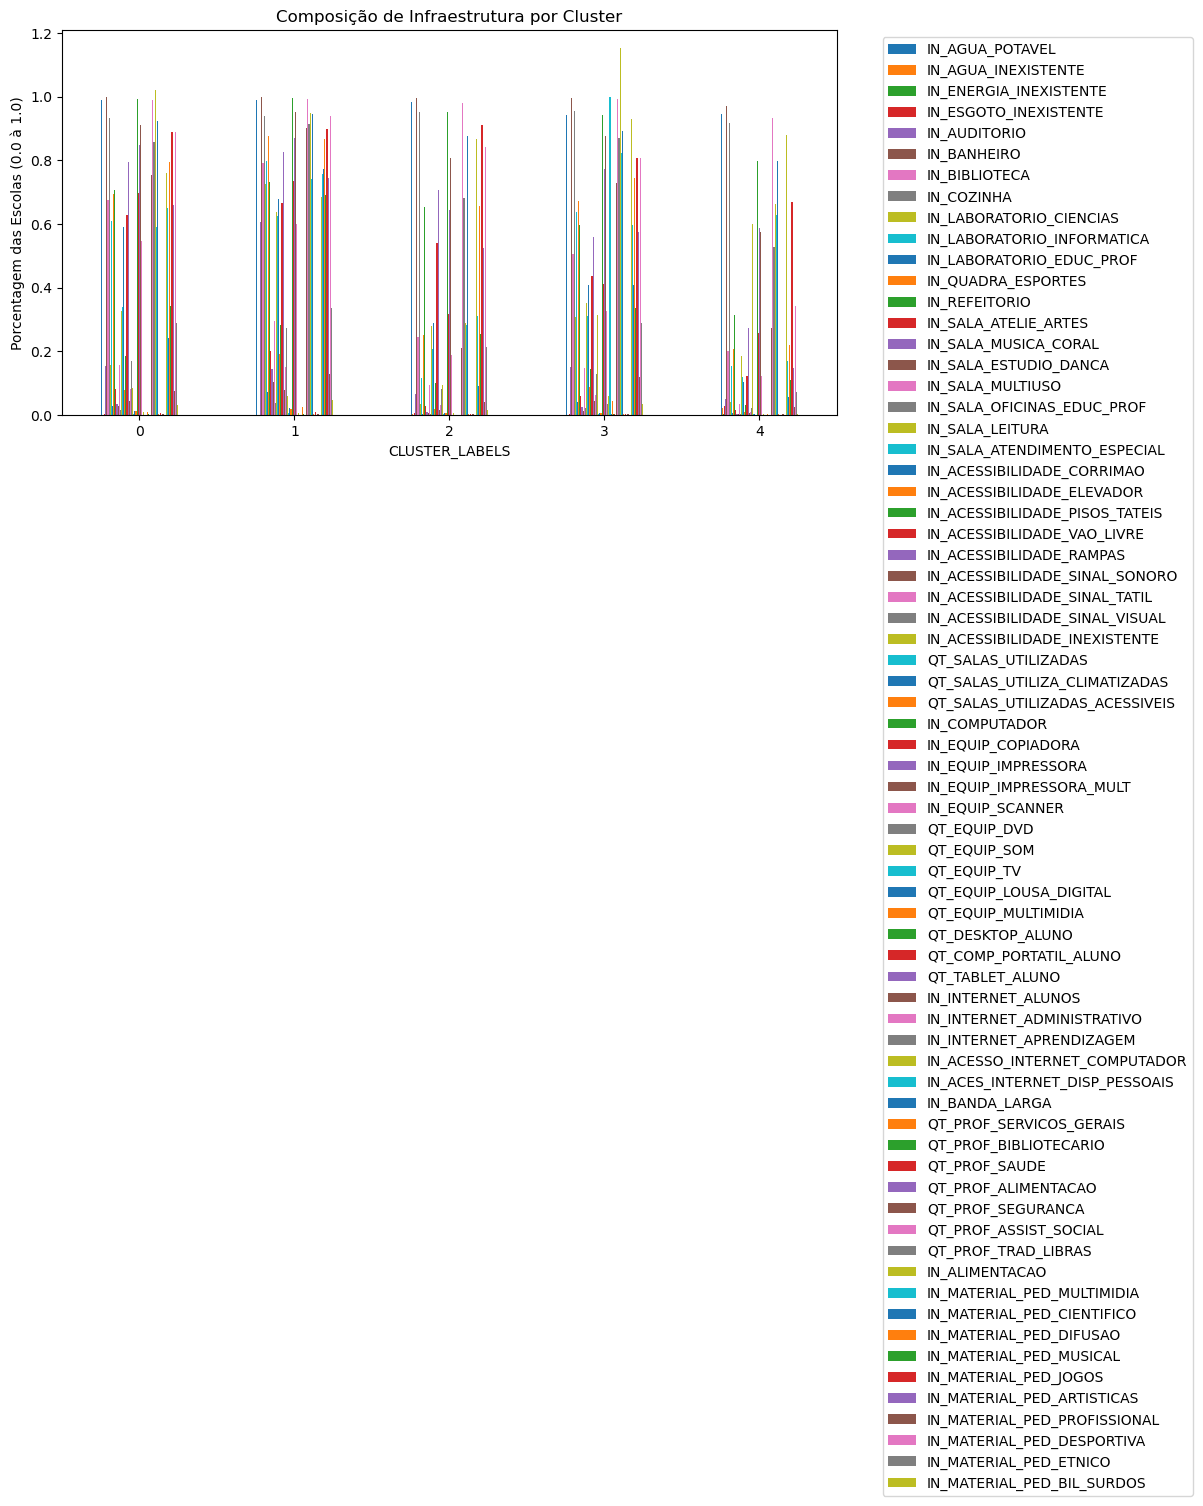

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 32681, ncost: 32296.22412982299
Run: 4, iteration: 2/100, moves: 13354, ncost: 32066.73386765698
Run: 4, iteration: 3/100, moves: 7504, ncost: 31877.936506563587
Run: 4, iteration: 4/100, moves: 2468, ncost: 31877.923003163545
Run: 4, iteration: 5/100, moves: 7, ncost: 31877.923002738702
Run: 4, iteration: 6/100, moves: 1, ncost: 31877.923002716612
Run: 4, iteration: 7/100, moves: 0, ncost: 31877.923002716612
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 74722, ncost: 51105.7143203714
Run: 3, iteration: 2/100, moves: 37804, ncost: 50950.25104126367
Run: 3, iteration: 3/100, moves: 5979, ncost: 50949.795173526225
Run: 3, iteration: 4/100, moves: 2682, ncost: 50949.76690512167
Run: 3, iteration: 5/100, moves: 1144, ncost: 50949.759544307904
Run: 3, iteration: 6/100, moves: 521, ncost: 50949.756651870666
Run: 3,

Exception ignored in: <function ResourceTracker.__del__ at 0x7f4a033d4fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 37282, ncost: 33473.71935344278
Run: 1, iteration: 2/100, moves: 16479, ncost: 33472.130830528244
Run: 1, iteration: 3/100, moves: 106, ncost: 33472.12229421041
Run: 1, iteration: 4/100, moves: 3, ncost: 33472.12058864399
Run: 1, iteration: 5/100, moves: 9, ncost: 33472.11813713336
Run: 1, iteration: 6/100, moves: 0, ncost: 33472.11813713336
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 31645, ncost: 33572.38087186517
Run: 10, iteration: 2/100, moves: 11868, ncost: 33264.75752930887
Run: 10, iteration: 3/100, moves: 3247, ncost: 33264.74203135458
Run: 10, iteration: 4/100, moves: 1, ncost: 33264.74200303437
Run: 10, iteration: 5/100, moves: 0, ncost: 33264.74200303437
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 25977, ncost: 49176.392835605

Exception ignored in: <function ResourceTracker.__del__ at 0x7f2f66110fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 31886, ncost: 32313.460530606804
Run: 2, iteration: 2/100, moves: 14575, ncost: 31877.99730297255
Run: 2, iteration: 3/100, moves: 6898, ncost: 31877.92301164268
Run: 2, iteration: 4/100, moves: 19, ncost: 31877.923002794938
Run: 2, iteration: 5/100, moves: 2, ncost: 31877.923002716616
Run: 2, iteration: 6/100, moves: 0, ncost: 31877.923002716616
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 34599, ncost: 33545.035886480364
Run: 9, iteration: 2/100, moves: 15989, ncost: 32121.117391286854
Run: 9, iteration: 3/100, moves: 7495, ncost: 31877.9571976526
Run: 9, iteration: 4/100, moves: 6079, ncost: 31877.923012803214
Run: 9, iteration: 5/100, moves: 27, ncost: 31877.923002794927
Run: 9, iteration: 6/100, moves: 2, ncost: 31877.923002716623
Run: 9, iteration: 7/100, moves: 0, ncost: 31877.923002716623
Init: initi

Exception ignored in: <function ResourceTracker.__del__ at 0x7f62b5fc8fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 45579, ncost: 33684.12707438746
Run: 5, iteration: 2/100, moves: 20090, ncost: 33462.138174602536
Run: 5, iteration: 3/100, moves: 4934, ncost: 33461.85026897606
Run: 5, iteration: 4/100, moves: 25, ncost: 33461.84948818674
Run: 5, iteration: 5/100, moves: 9, ncost: 33461.84948135889
Run: 5, iteration: 6/100, moves: 0, ncost: 33461.84948135889
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 35866, ncost: 49517.996953827285
Run: 2, iteration: 2/100, moves: 14562, ncost: 47591.98021393361
Run: 2, iteration: 3/100, moves: 1706, ncost: 46605.76859446165
Run: 2, iteration: 4/100, moves: 0, ncost: 46605.76859446165
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 31384, ncost: 50080.59967309605
Run: 10, iteration: 2/100, moves: 21049, ncost: 50059.90265

Exception ignored in: <function ResourceTracker.__del__ at 0x7fb845e68fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 41253, ncost: 33725.50278010202
Run: 3, iteration: 2/100, moves: 20628, ncost: 33465.875602749424
Run: 3, iteration: 3/100, moves: 12800, ncost: 33462.24508395497
Run: 3, iteration: 4/100, moves: 62, ncost: 33462.22019955029
Run: 3, iteration: 5/100, moves: 18, ncost: 33462.21293149669
Run: 3, iteration: 6/100, moves: 3, ncost: 33462.21262109287
Run: 3, iteration: 7/100, moves: 0, ncost: 33462.21262109287
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 46557, ncost: 50790.52511660137
Run: 6, iteration: 2/100, moves: 11874, ncost: 48220.71033361618
Run: 6, iteration: 3/100, moves: 4061, ncost: 48101.882608396365
Run: 6, iteration: 4/100, moves: 7, ncost: 48101.882514665114
Run: 6, iteration: 5/100, moves: 0, ncost: 48101.882514665114
Init: initializing centroids
Init: initializing clusters
Starting iterations...

Exception ignored in: <function ResourceTracker.__del__ at 0x7fad8cb68fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 34703, ncost: 32641.813014825977
Run: 6, iteration: 2/100, moves: 14297, ncost: 31959.282386706065
Run: 6, iteration: 3/100, moves: 8875, ncost: 31877.92326349433
Run: 6, iteration: 4/100, moves: 200, ncost: 31877.923014198645
Run: 6, iteration: 5/100, moves: 1, ncost: 31877.923014180466
Run: 6, iteration: 6/100, moves: 0, ncost: 31877.923014180466
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 156732, ncost: 50078.936596851796
Run: 1, iteration: 2/100, moves: 43805, ncost: 49933.85819017528
Run: 1, iteration: 3/100, moves: 8496, ncost: 49762.20257437193
Run: 1, iteration: 4/100, moves: 2574, ncost: 49762.18419536394
Run: 1, iteration: 5/100, moves: 1, ncost: 49762.18419535851
Run: 1, iteration: 6/100, moves: 0, ncost: 49762.18419535851
Init: initializing centroids
Init: initializing clusters
Starting iteratio

Exception ignored in: <function ResourceTracker.__del__ at 0x7f40eab94fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 36243, ncost: 32616.111774817487
Run: 8, iteration: 2/100, moves: 15165, ncost: 31877.9776922015
Run: 8, iteration: 3/100, moves: 8240, ncost: 31877.923023691423
Run: 8, iteration: 4/100, moves: 32, ncost: 31877.92300288541
Run: 8, iteration: 5/100, moves: 2, ncost: 31877.9230027387
Run: 8, iteration: 6/100, moves: 1, ncost: 31877.923002716616
Run: 8, iteration: 7/100, moves: 0, ncost: 31877.923002716616
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 23630, ncost: 51289.14424740418
Run: 4, iteration: 2/100, moves: 25901, ncost: 50439.00800625504
Run: 4, iteration: 3/100, moves: 9586, ncost: 50402.513427398924
Run: 4, iteration: 4/100, moves: 1019, ncost: 50402.50745764988
Run: 4, iteration: 5/100, moves: 20, ncost: 50402.50745313805
Run: 4, iteration: 6/100, moves: 2, ncost: 50402.50745290432
Run: 4, iteration

Exception ignored in: <function ResourceTracker.__del__ at 0x7f22b8a38fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 44909, ncost: 33786.4624463121
Run: 7, iteration: 2/100, moves: 19436, ncost: 33463.79839456565
Run: 7, iteration: 3/100, moves: 8784, ncost: 33461.87707475975
Run: 7, iteration: 4/100, moves: 60, ncost: 33461.849503858124
Run: 7, iteration: 5/100, moves: 15, ncost: 33461.849482132246
Run: 7, iteration: 6/100, moves: 3, ncost: 33461.849481358884
Run: 7, iteration: 7/100, moves: 0, ncost: 33461.849481358884
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 20921, ncost: 52096.54294157959
Run: 5, iteration: 2/100, moves: 22649, ncost: 51056.32026911292
Run: 5, iteration: 3/100, moves: 29855, ncost: 51055.327677015055
Run: 5, iteration: 4/100, moves: 2589, ncost: 51055.26261667876
Run: 5, iteration: 5/100, moves: 2788, ncost: 50968.412930750674
Run: 5, iteration: 6/100, moves: 2632, ncost: 50968.393324073935
Run: 5,

Exception ignored in: <function ResourceTracker.__del__ at 0x7f0be52e0fe0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [20]:
profile = df.groupby('CLUSTER_LABELS')[[col for col in df.columns if not col == 'CLUSTER_LABELS']].mean()

profile.plot(kind='bar', figsize=(10, 5))
plt.title('Composição de Infraestrutura por Cluster')
plt.ylabel('Porcentagem das Escolas (0.0 à 1.0)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
#plt.tight_layout()
plt.savefig('clusters-plot-5clusters.png', bbox_inches='tight')
plt.show()